# Part I - Dataset Exploration for Ford GoBike System 
## by Sizwe Zwane

## Introduction
My chosen dataset is showing information that covers over 180K records of individual rides made in a bike-sharing system covering the greater San Francisco Bay area in Feb-2019.

This notebook is mainly aimed to answer some questions such as:

When are most trips taken in terms of period in a day, and day of the week?
How long does the average trip take?
Does the above depend on if a user is a subscriber or customer?

# Step 1: Gathering Data

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the matplotlib graphs will be included in your notebook and plot size for this notebook:
%matplotlib inline

params = {
    "font.size": 12,
    "figure.figsize" : (10, 6)
}
plt.rcParams.update(params)

In [2]:
rides = pd.read_csv('201902-fordgobike-tripdata.csv', sep=',',parse_dates=['start_time', 'end_time'])
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Step 2: Assessing Data

In [3]:
# sort by start date for ease assessment from recent.
rides = rides.sort_values(by='start_time', ascending=False).reset_index(drop=True)
print(rides.info())
rides.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,208,2019-02-28 23:59:18.548,2019-03-01 00:02:47.228,349.0,Howard St at Mary St,37.781010,-122.405666,60.0,8th St at Ringold St,37.774520,-122.409449,6361,Subscriber,1993.0,Male,Yes
1,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes
2,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993.0,Male,No
3,395,2019-02-28 23:56:26.848,2019-03-01 00:03:01.947,243.0,Bancroft Way at College Ave,37.869360,-122.254337,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,4786,Subscriber,1988.0,Male,No
4,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
5,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
6,252,2019-02-28 23:52:51.164,2019-02-28 23:57:03.976,190.0,West St at 40th St,37.830223,-122.270950,189.0,Genoa St at 55th St,37.839649,-122.271756,5678,Subscriber,1975.0,Male,No
7,367,2019-02-28 23:51:06.014,2019-02-28 23:57:13.312,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,1804,Subscriber,1997.0,Female,No
8,163,2019-02-28 23:50:45.698,2019-02-28 23:53:29.569,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5669,Subscriber,1996.0,Male,Yes
9,548,2019-02-28 23:50:41.607,2019-02-28 23:59:49.953,131.0,22nd St at Dolores St,37.755000,-122.425728,71.0,Broderick St at Oak St,37.773063,-122.439078,6572,Subscriber,1981.0,Male,No


> from the above we can tell that the data is not complete as some columns have missing values.

In [4]:
# Check total for Null Values
rides.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
rides.loc[rides.member_birth_year.isna()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
17,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
29,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
69,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
129,372,2019-02-28 22:46:19.114,2019-02-28 22:52:31.477,369.0,Hyde St at Post St,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,NaN,NaN,No
141,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No


> I look to make use of the both the member_birth_year and member_gender column later for analysis. These missing values are a inconvenience in my analysis. and make up less than 5% of my dataset.

In [6]:
rides.loc[rides.start_station_id.isna()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
576,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1885,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3461,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4041,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5633,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes


> upon checking on Google Maps the start and end station coordinates are for a Valley Transportation Authority (VTA) HQ, which is one of the governing parties for the Caltrain commuter rail line that serves the county. We only focusing on bikes.

In [7]:
(rides.duration_sec/60).describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_sec, dtype: float64

> The shortest trip took 1 minutes and the longest 1424 minutes (23.7 hours)

### What is the structure of your dataset?

- The dataset is made up of a total of 16 columns which are datetime64(2), float64(7), int64(2), and object(5) columns. Both the member_gender and member_birth_year columns have 8265 missing values while the start_station_id, start_station_name, end_station_id and end_station_name have 197 missing values.         

### What is/are the main feature(s) of interest in your dataset?

- I am mostly interested in the duration_sec column, I want to better understand the average bike trip duration for February 2019.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- The columns start_time, end_time, start_station_name, end_station_name, user_type, member_birth_year, member_gender, and bike_share_for_all_trip values or status will help me see how they affect the trip duration for each bike trip.

# Step 3: Cleaning Data

creating a copy for rides dataframe using `Dataframe.copy()`

In [8]:
rides_clean = rides.copy()

**Define**

rides_clean contains multiple columns with null rows. **Drop all rows with null values.**

**Code**

In [9]:
rides_clean.dropna(inplace=True)
rides_clean.reset_index(inplace=True, drop=True)

**Test**

In [10]:
rides_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

**Define**

member_gender, bike_share_for_all_trip, and user_type columns are of category dtype. Change columns dytpe to category dtype using `pd.Series.astype`

**Code**

In [11]:
for col in ['member_gender', 'bike_share_for_all_trip', 'user_type']:
    rides_clean[col] = rides_clean[col].astype('category')

**Test**

In [12]:
rides_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

**Define**

for ease understanding and presentation I need a age column. Using the member_birth_year create a age column for the riders in the year 2017.

**Code**

In [13]:
rides_clean['age'] = rides_clean.member_birth_year.apply(lambda x: 2017 - x)
rides_clean['age'] = pd.to_numeric(rides_clean['age'], downcast='signed', errors='ignore')

**Test**

In [14]:
rides_clean['age'].head(10)

0    24
1    21
2    24
3    29
4    34
5    43
6    42
7    20
8    21
9    36
Name: age, dtype: int16

**Define**

for ease understanding and presentation I need a duration_min column. Using the duration_sec create a duration_min column.

**Code**

In [15]:
rides_clean['duration_min'] = round(rides_clean.duration_sec/60, 2)

**Test**

In [16]:
rides_clean['duration_min'].tail(10)

174942     4.15
174943     1.85
174944     4.27
174945    15.97
174946     2.35
174947     5.22
174948     2.32
174949     8.00
174950    11.77
174951     4.52
Name: duration_min, dtype: float64

**Define**

**Code**

In [17]:
period = []
for time in rides_clean.start_time.dt.hour:
    if time in range(5, 12):
        period.append('Morning')
    elif time in range(12, 17):
        period.append('Afternoon')
    elif time in range(17, 21):
        period.append('Evening')
    else:
        period.append('Night')

period_cats = ['Morning', 'Afternoon', 'Evening', 'Night']
rides_clean['period_day'] = period
rides_clean['period_day'] = rides_clean['period_day'].astype(pd.CategoricalDtype(categories=period_cats, ordered=True))

**Test**

In [18]:
rides_clean['period_day'].unique()

['Night', 'Evening', 'Afternoon', 'Morning']
Categories (4, object): ['Morning' < 'Afternoon' < 'Evening' < 'Night']

**Define**

rides_clean dataframe contains redundant columns. Drop redundant columns using pd.DataFrame.drop

**Code**

In [19]:
redundant_col = ['start_station_id', 'end_station_id', 'bike_id', 'member_birth_year', 'duration_sec']
rides_clean.drop(redundant_col, axis=1, inplace=True)

**Test**

In [20]:
rides_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_name       174952 non-null  object        
 3   start_station_latitude   174952 non-null  float64       
 4   start_station_longitude  174952 non-null  float64       
 5   end_station_name         174952 non-null  object        
 6   end_station_latitude     174952 non-null  float64       
 7   end_station_longitude    174952 non-null  float64       
 8   user_type                174952 non-null  category      
 9   member_gender            174952 non-null  category      
 10  bike_share_for_all_trip  174952 non-null  category      
 11  age                      174952 non-null  int16         
 12  duration_min    

Create a CSV file

In [21]:
rides_clean.to_csv('rides_clean.csv', index=False)

# Step 4: Data Exploration

## Univariate Exploration

**Question**

1. How long does the average trip take?

**Visualization**

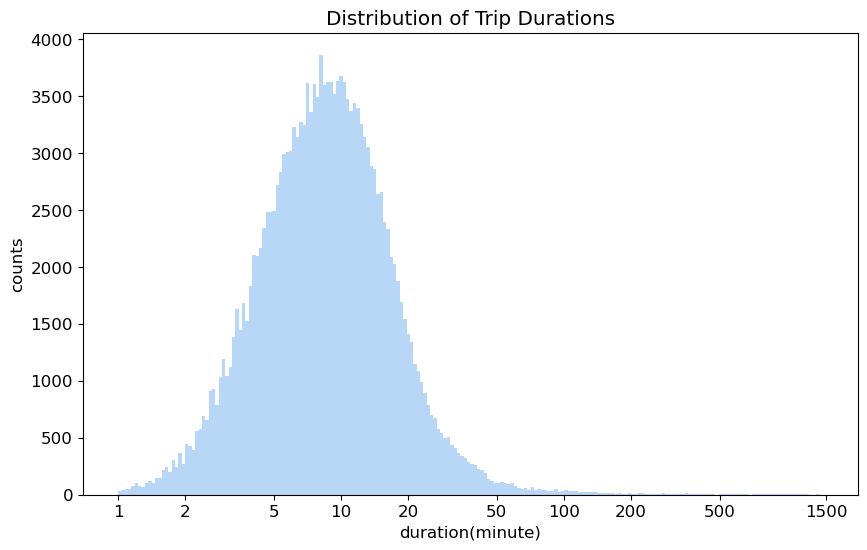

In [22]:
fig, ax = plt.subplots()
log_binsize = 0.05
base_color = sns.color_palette('pastel')[0]
bins = 2 ** np.arange(0, 10.5 + log_binsize, log_binsize)
sns.histplot(x=rides_clean['duration_min'], ax=ax, bins= bins, color= base_color)

ax.set_xscale('log', base=2)
ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1500]
ax.set_xticks(ticks, ticks)

ax.set_title('Distribution of Trip Durations')
ax.set_xlabel('duration(minute)')
ax.set_ylabel('counts')
plt.show()

**Observations**

- most trips take 8.5 mins with about 3800 counts followed by 11.5 mins with 3600 counts.
- this mean the bikers or users are travelling between close proximities.
- when put in a log scale the chart looks bimodal/ double-peaked.

**Question**

2. Which days are most trips taken?

**Visualization**

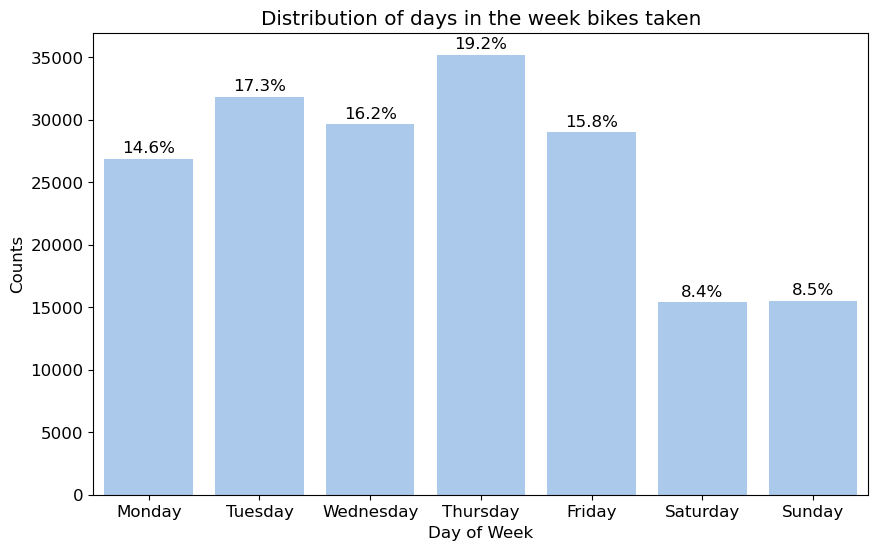

In [23]:
# Distribution of days in the week bikes taken
fig, ax = plt.subplots()
week_day = rides.start_time.dt.day_of_week.value_counts()
week_day.sort_index(inplace=True)
sns.barplot(y=week_day, x=week_day.index, ax=ax, color= base_color)
total = week_day.sum()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = week_day[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/total)
    plt.text(loc, count+500, pct_string, ha='center', color='black')

day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(week_day.index, day_of_week)
ax.set_title('Distribution of days in the week bikes taken')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Counts')
plt.show()

**Observations**

- most bikes trips started are during the week, with Thursday having the highest number of bike trips of about 33000 trips. 
- both Saturday and Sunday have the lowest trips started with trip count around 15000.

**Question**

3. What period in a day are most trips taken?

**Visualization**

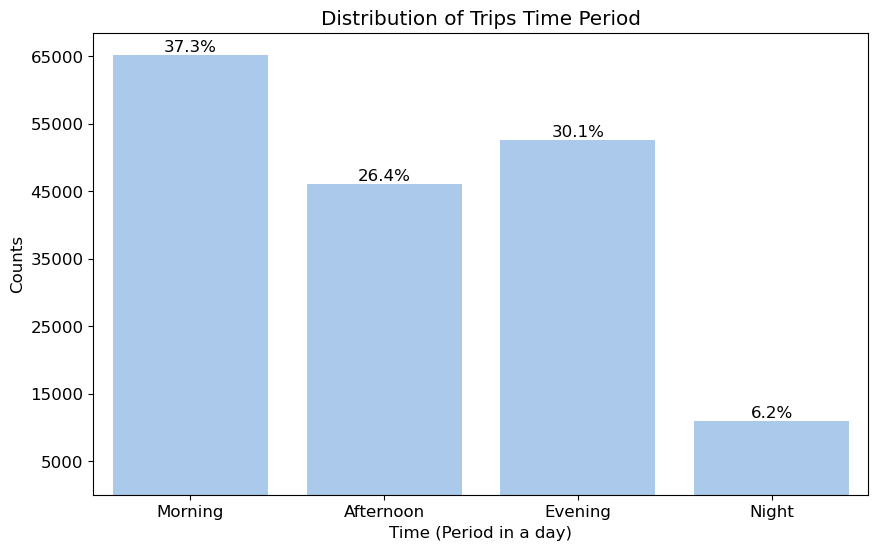

In [24]:
fig, ax = plt.subplots()
period_day = rides_clean['period_day'].value_counts()
sns.barplot(y=period_day, x=period_day.index, ax=ax, color= base_color)
ticks = np.arange(5000, 70000, 10000)
ax.set_yticks(ticks)

total = period_day.sum()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = period_day[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total)
    plt.text(loc, count+500, pct_string, ha='center', color='black')

ax.set_title('Distribution of Trips Time Period')
ax.set_xlabel('Time (Period in a day)')
ax.set_ylabel('Counts')
plt.show()

**Observations**

- most trips started were taken in the morning with 65000 recorded trips. second place is in the evening with about 50000 trips taken. This maybe possible be caused by the user (or trip takers) being the working class.
- only about 11000 trips are taken during the night.

**Question**

4. Which age group mostly take bike trips?

**Visualization**

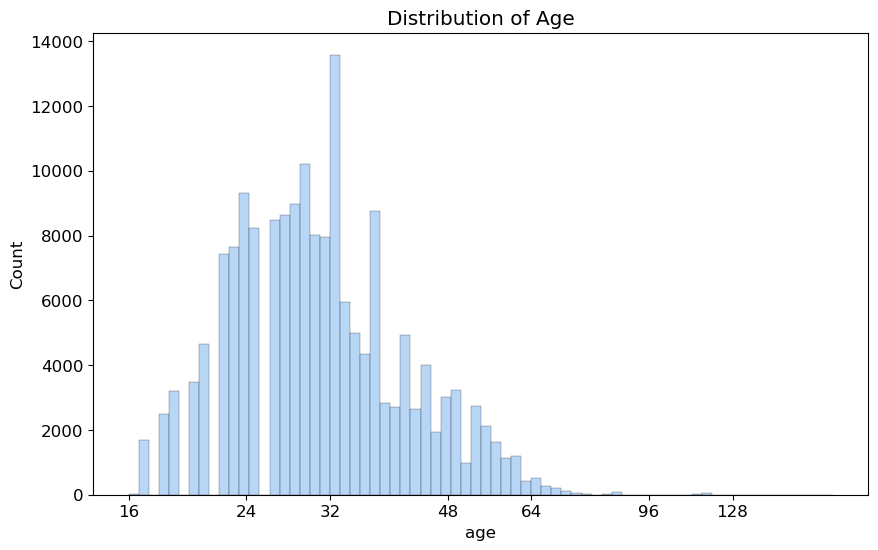

In [25]:
fig, ax = plt.subplots()
log_binsize = 0.05
bins = 2 ** np.arange(4, 7.5+ log_binsize, log_binsize)
sns.histplot(x='age', ax=ax, data=rides_clean, bins=bins, color=base_color)
ax.set_xscale('log', base=2)
ticks = [16, 24, 32, 48, 64, 96, 128]
ax.set_xticks(ticks, ticks)
ax.set_title('Distribution of Age')
plt.show()

**Observations**

- most bike riders are between the ages 20 to 32 with about 10000+ counts. which influences mjy idead for a working class using these bikes.
- when scaling x-axis the data is mostly skewed to the right and its bimoodal.

**Question**

5. How is user type distributed?

**Visualization**

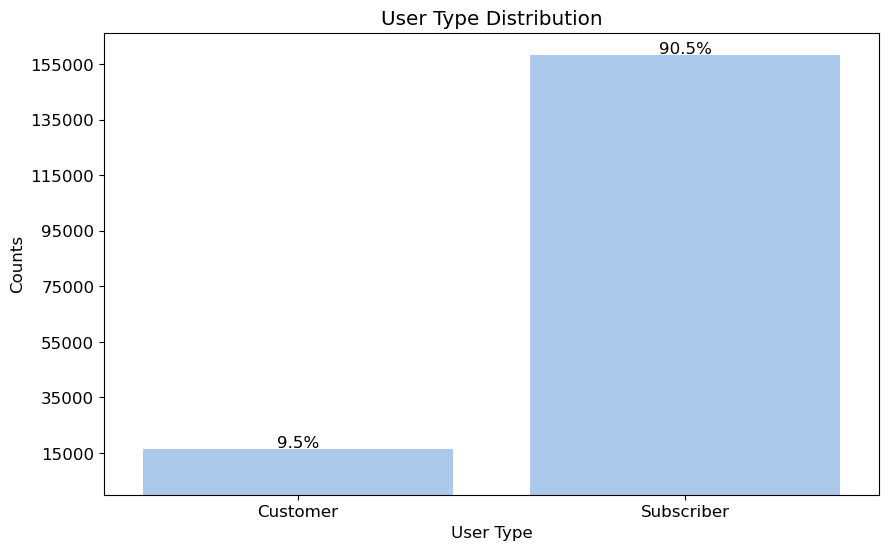

In [26]:
def draw_easy_bar(bar_col, ticks, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    sns.countplot(data=rides_clean, x=bar_col, ax= ax, color=base_color)
    ax.set_yticks(ticks, ticks)

    counts = rides_clean[bar_col].value_counts()
    total = counts.sum()
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/total)
        plt.text(loc, count+500, pct_string, ha='center', color='black')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

ticks = np.arange(15000, 160000, 20000)
draw_easy_bar('user_type', ticks, 'User Type Distribution', 'User Type', 'Counts')

**Observations**

- the dataset has about 155000 subscribers and 15000 customers.
- this further influences that most user use thesew bikes as a reliable mode of transport between the stations since most users are subscribers.

**Question**

6. How many bikers share a trip?

**Visualization**

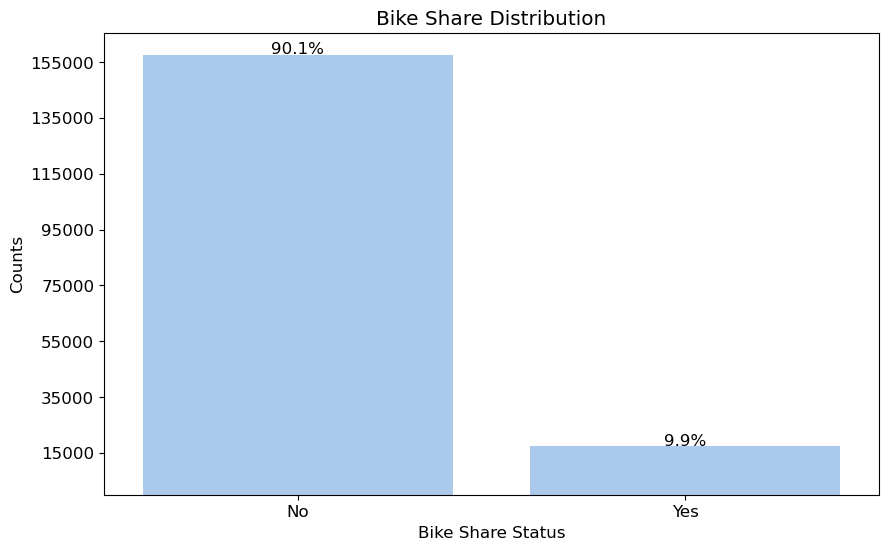

In [27]:
ticks = np.arange(15000, 160000, 20000)
draw_easy_bar('bike_share_for_all_trip', ticks, 'Bike Share Distribution', 'Bike Share Status', 'Counts')

**Observations**

- most people in this dataset do not share their trips as the looking for comfort and can afford the price with above 160000+ users not sharing.

**Question**

7. What is the Gender Distribution? 

**Visualization**

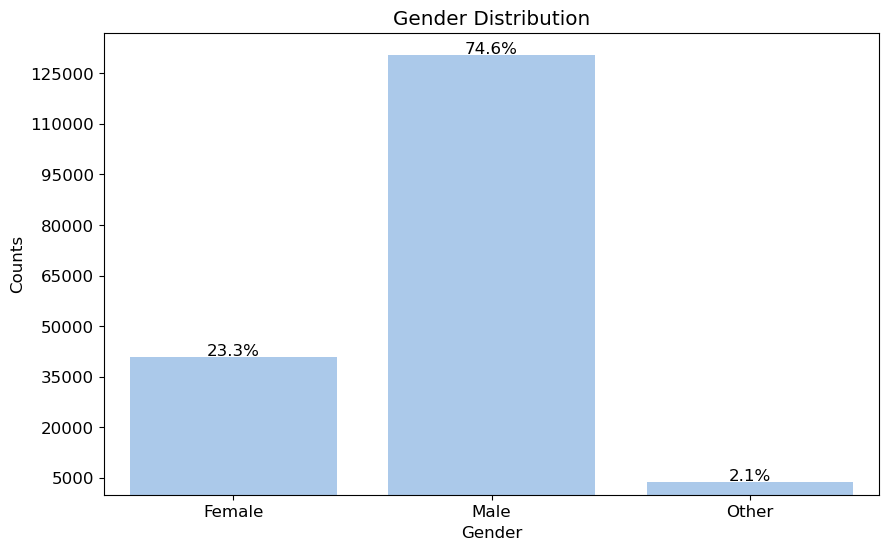

In [28]:
ticks = np.arange(5000, 140000, 15000)
draw_easy_bar('member_gender', ticks, 'Gender Distribution', 'Gender', 'Counts')

**Observations**

- males normally use these bikes with over 120000+ males and with the females having just above 35000+ using this service.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The bike duration and age distribution had a lot of it values skewed to the right, i did perform a log transform  to better see the distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- There was no unusual distributions. On this dataset I removed all rows with one or more null values, this reduced the number of rows from 183412 to 174952 (~4.7%) this is to work with complete and consistent dataset. Changed the member_gender, bike_share_for_all_trip, user_type column dtype to categories. Created an age column using the member_birth_year column and created a duration_min using duration_sec column and lastly using the start_time column I created a period_day column.

## Bivariate Exploration

**Question**

8. Which day of the week do trips last the longest?

**Visualization**

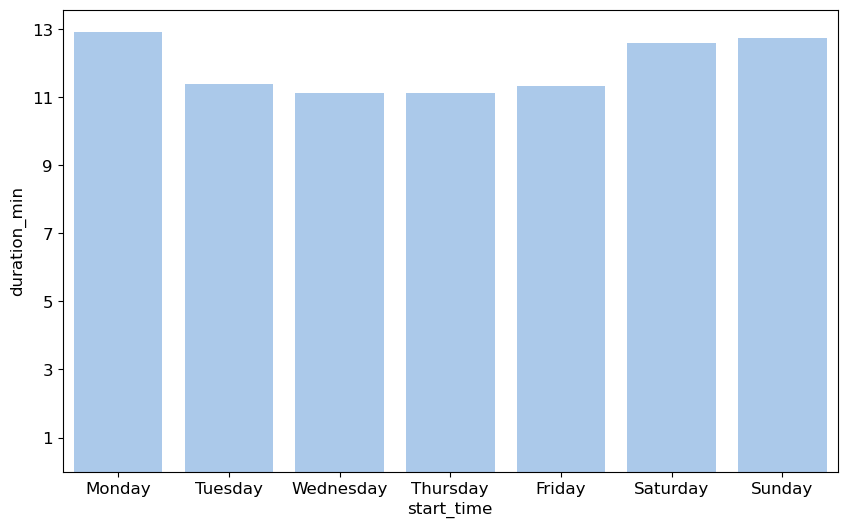

In [29]:
fig, ax = plt.subplots()
dur_per_day = rides_clean.groupby([rides.start_time.dt.day_of_week])['duration_min'].mean()
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=dur_per_day.index, y=dur_per_day,color=base_color, ax=ax)
ax.set_xticks(np.arange(0, 7), day_of_week)
ax.set_yticks(np.arange(1, 15, 2))
plt.show()

**Observations**

- Trip taken during the week last on average of 10-12 minutes while trips taken during the weekend last for atleast 14 minutes.

**Question**

9. Which period in a day do trips last the longest?

**Visualization**

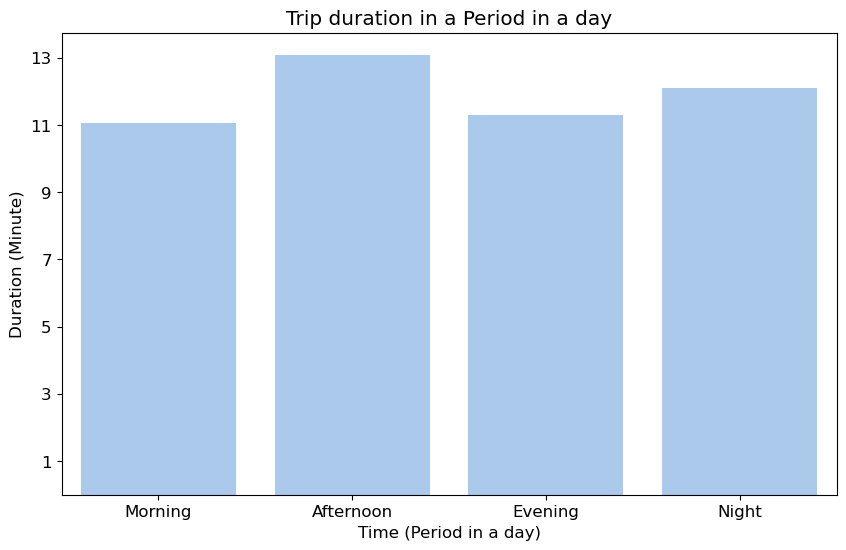

In [30]:
# duration vs period_day
fig, ax = plt.subplots()
dur_per_hour = rides_clean.groupby('period_day')['duration_min'].mean()
sns.barplot(x=dur_per_hour.index, y=dur_per_hour, ax=ax, color=base_color)
ax.set_yticks(np.arange(1, 15, 2))
ax.set_title('Trip duration in a Period in a day')
ax.set_xlabel('Time (Period in a day)')
ax.set_ylabel('Duration (Minute)')
plt.show()

**Observations**

- trips taken in the afternoon and night last for and average of 12 minutes while morning and evening trip tast for and average of 11 minutes.

**Question**

10. Does the age incease duration of the trip?

**Visualization**

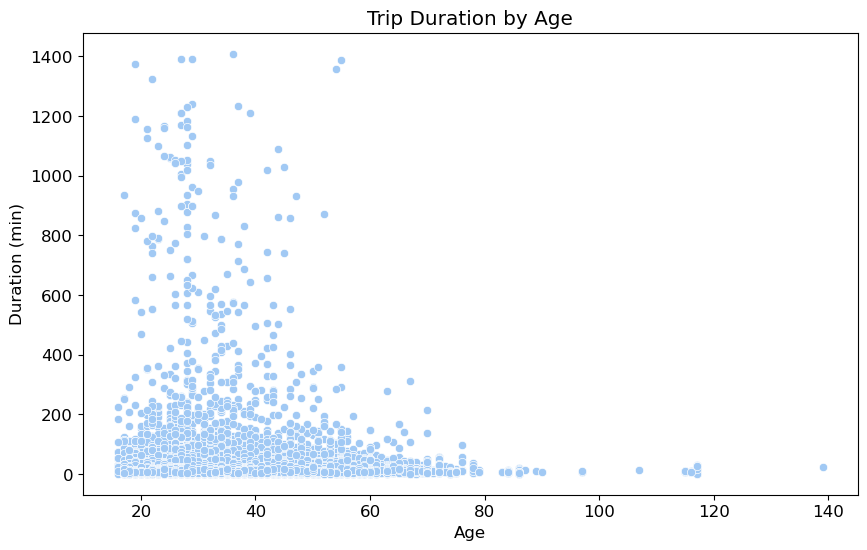

In [31]:
# duration vs age
fig, ax = plt.subplots()
bins = 2 ** np.arange(4, 7.5+ 0.05, 0.05)
# sns.heatmap(rides_clean.loc[:, ['age', 'duration_min']].corr(), annot=True)
sns.scatterplot(data=rides_clean, x='age', y='duration_min',color=base_color)
ax.set_title('Trip Duration by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Duration (min)')
plt.show()


**Observations**

- there is an inverse proportionality between age and trip duration as we can see that as the age goes up their duration goes down.

**Question**

11. Trip Duration and User Type

**Visualization**

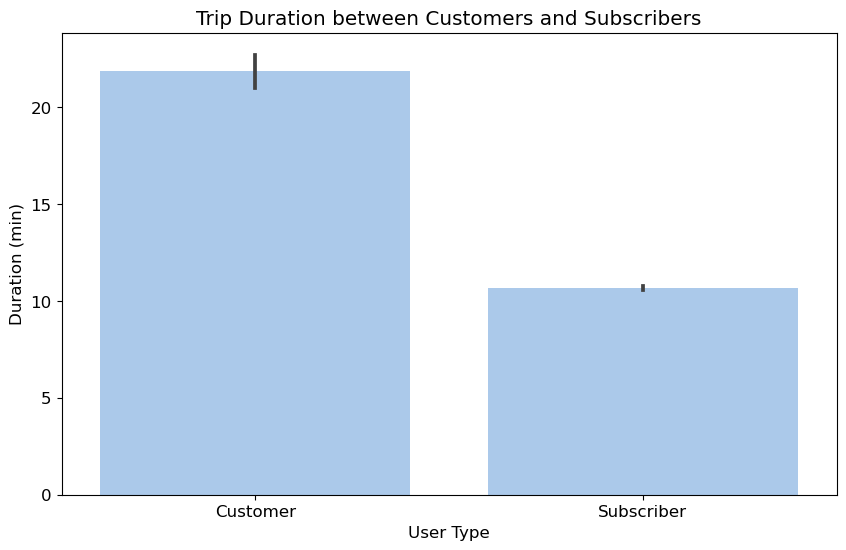

In [32]:
# duration vs user type
fig, ax = plt.subplots()
sns.barplot(x='user_type', ax=ax, data=rides_clean, y='duration_min',color=base_color)
ax.set_title('Trip Duration between Customers and Subscribers')
ax.set_xlabel('User Type')
ax.set_ylabel('Duration (min)')
plt.show()

**Observations**

- most subscribers trip does 11 minutes  while customer goes for 20+ minutes.

**Question**

12. Which gender use the bike more on average?

**Visualization**

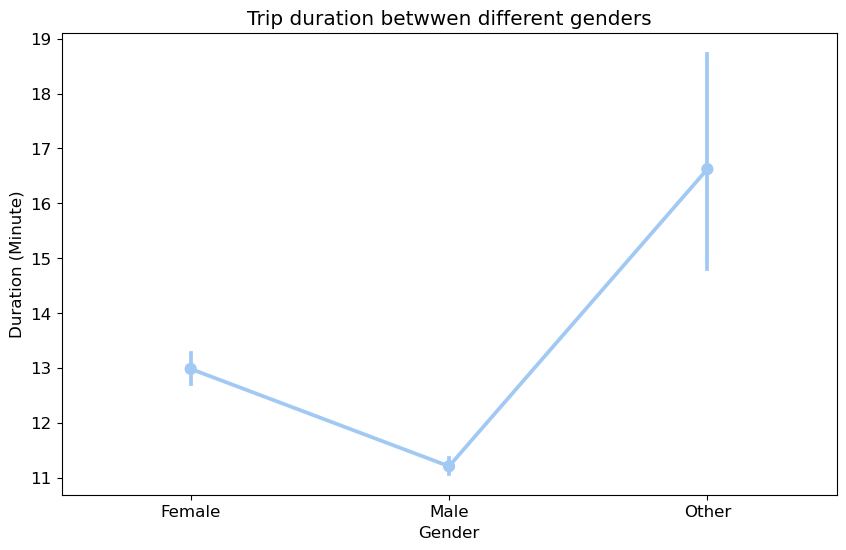

In [33]:
# duration vs gender
fig, ax = plt.subplots()
sns.pointplot(x='member_gender', ax=ax, data=rides_clean, y='duration_min',color=base_color)
ax.set_title('Trip duration betwwen different genders')
ax.set_xlabel('Gender')
ax.set_ylabel('Duration (Minute)')
plt.show()

**Observations**

- female trips are long with 13 minutes average while the male tripps avarege 11 minutes.
- others meaning those who choose not to revieal their geder, those trips last for 15+ minutes, with the highest boundries between 14 and 19 minutes per trip.

**Question**

13. Do user who share a trip have a different duration?

**Visualization**

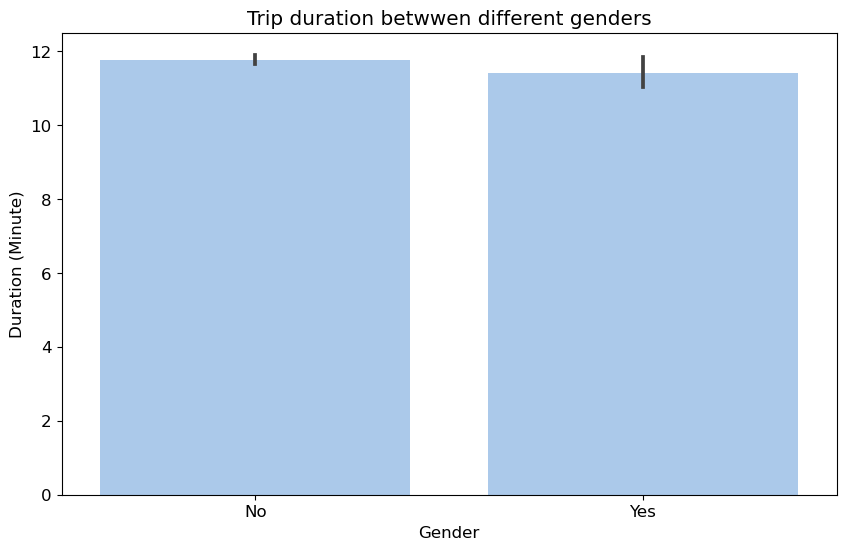

In [34]:
# duration vs bikeshare
fig, ax = plt.subplots()
sns.barplot(x='bike_share_for_all_trip', ax=ax, data=rides_clean, y='duration_min',color=base_color)
ax.set_title('Trip duration betwwen different genders')
ax.set_xlabel('Gender')
ax.set_ylabel('Duration (Minute)')
plt.show()

**Observations**

- the users whom share or not share thier trips often take the same amount of time during the trip with both parties averaging just above 11 minutes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Trip duration vs gender, we find that between male and famale the females trip last the long. Most subscribers trip last for at least 11 minutes while custormer trips lastes up to 20 minutes+.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Yes to see how sharing the trip affects the duration and we found that trip share status doesn't affect the duration.

## Multivariate Exploration

**Question**

14. What is the trip duration for each member gender with respect to user type?

**Visualization**

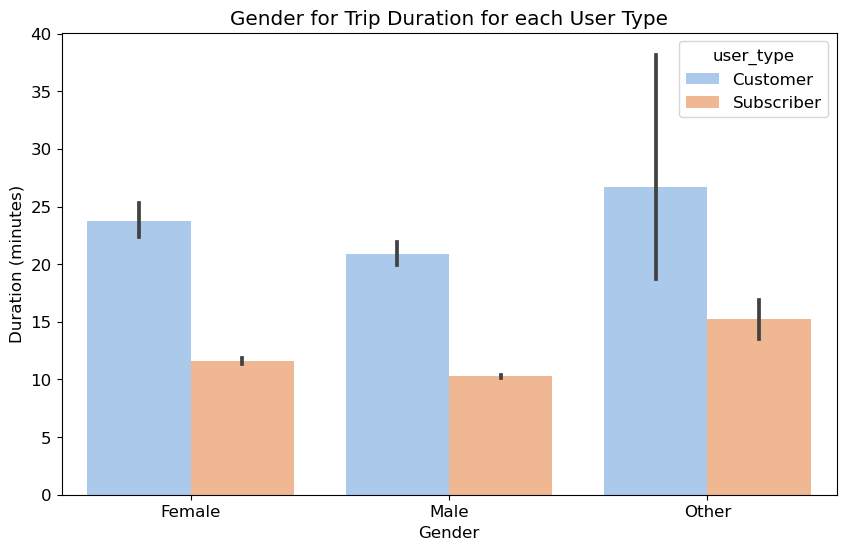

In [35]:
fig, ax = plt.subplots()
sns.barplot(x='member_gender', ax=ax, data=rides_clean, y='duration_min', hue='user_type', palette='pastel')
ax.set_title('Gender for Trip Duration for each User Type')
ax.set_ylabel('Duration (minutes)')
ax.set_xlabel('Gender')
plt.show()

**Observations**

- most users who subscribed used the bikes for 15 minutes at most with 11 - 12 minute average.
- those not subscribed trips take an avarage of 20+ minutes.
- there's more female customers than males 

**Question**

15. What is the trip duration on a weekday for each gender type?

**Visualization**

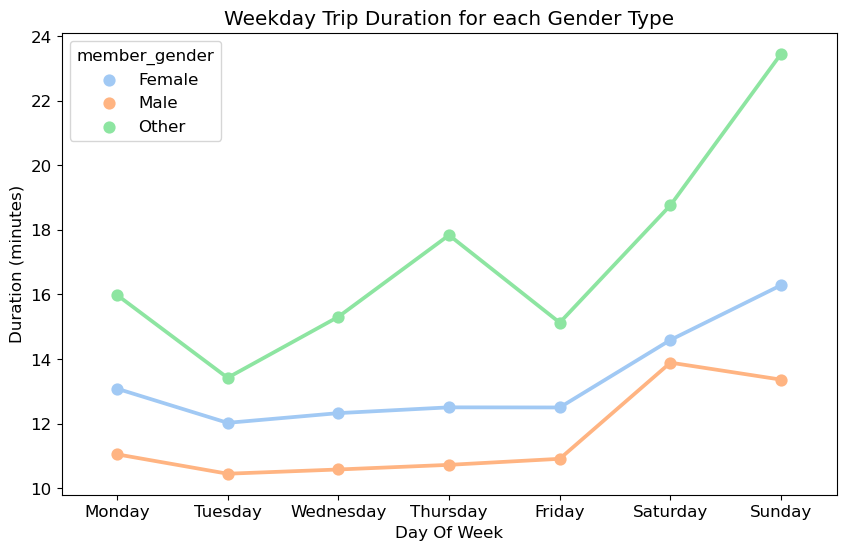

In [36]:
fig, ax = plt.subplots()
sns.pointplot(data = rides_clean, x = rides_clean.start_time.dt.weekday, y = 'duration_min', hue = 'member_gender', palette = 'pastel', ci=None, ax= ax)
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(np.arange(0,7),day_of_week)
ax.set_title('Weekday Trip Duration for each Gender Type')
ax.set_ylabel('Duration (minutes)')
ax.set_xlabel('Day Of Week')
plt.show()

**Observations**

- males trip duration peeks on weekend with a 12 minute trip duration. Averaging 11 minutes during the week. 
- women average 12 weekday and peak at 15 minutes on weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Trip duration for each gender type whether or not they are subscribers and I found that males have the shortest trips accross the board
- I also investigated if the day of the week affects duratyion and found that males still have the shortestr trips.

### Were there any interesting or surprising interactions between features?

- Yes, I found that femaler both have longest trips and most subrscriber as comparared to males.